1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [22]:
import pandas as pd
import numpy as np
import datetime as dt

# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/



--2022-12-02 21:58:00--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2022-12-02 21:58:00--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf4504e5ca904765509183ce29f.dl.dropboxusercontent.com/cd/0/inline/Bx7-gjUhAcvYgaLeQuUKV4g2oDr9l0oxlTTjaf5-YMDo_DAR_16x_DJLZAwx0hh3X8VIwLHoa93JAZLTPhMv2_cHOXhiOMjnN4ndiQY9hpExoJ51g-md65SpMLiLUbydsbLi39dp_k51vGOpBio-Y1k7YBxae2C8HkFldi4hKXCsqw/file# [following]
--2022-12-02 21:58:01--  https://ucf4504e5ca904765509183ce29f.dl.dropboxusercontent.com/cd/0/inline/Bx7-gjUhAcvYgaLeQuUKV4g2oDr9l0oxlTTjaf5-YMDo_DAR_16x_DJLZAwx0hh3X8VIwLHoa93JAZLTPhMv2_cHOXhiOMjnN

 21650K .......... .......... .......... .......... .......... 66% 8.06M 1s
 21700K .......... .......... .......... .......... .......... 67% 8.81M 1s
 21750K .......... .......... .......... .......... .......... 67% 8.64M 1s
 21800K .......... .......... .......... .......... .......... 67% 8.65M 1s
 21850K .......... .......... .......... .......... .......... 67% 7.90M 1s
 21900K .......... .......... .......... .......... .......... 67% 5.96M 1s
 21950K .......... .......... .......... .......... .......... 67% 1.77M 1s
 22000K .......... .......... .......... .......... .......... 68% 8.57M 1s
 22050K .......... .......... .......... .......... .......... 68% 7.69M 1s
 22100K .......... .......... .......... .......... .......... 68% 8.63M 1s
 22150K .......... .......... .......... .......... .......... 68% 8.25M 1s
 22200K .......... .......... .......... .......... .......... 68% 8.29M 1s
 22250K .......... .......... .......... .......... .......... 68% 7.78M 1s
 22300K ....

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [23]:
import pandas as pd
import numpy as np
import datetime as dt
file_name = "./data/data_000637.txt"
data = pd.read_csv(file_name)
print (data)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]


In [24]:
import pandas as pd
import numpy as np
import datetime as dt
deneme2 = data['ORBIT_CNT']
print(deneme2)

0          3869200167
1          3869200167
2          3869200167
3          3869200167
4          3869200167
              ...    
1310715    3869211171
1310716    3869211171
1310717    3869211171
1310718    3869211171
1310719    3869211171
Name: ORBIT_CNT, Length: 1310720, dtype: int64


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [25]:
deneme1 = data['BX_COUNTER']
deneme2 = data['ORBIT_CNT']
element = 3869200167
list_main = []
for i in range(1,len(deneme2)):
#     print(deneme1[i])
    if deneme2[i] != element:
        list_main.append(deneme1[i-1])
    element = deneme2[i]  
# print("The list of BX Counter values before it reset to 0 and make ORBIT_CNT rise by 1 point \n----------\n",list_main)
print("Maximum Value for Orbit Count to rise is", max(list_main),' before reset to zero ')
# print(list_main)

Maximum Value for Orbit Count to rise is 3563  before reset to zero 


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [27]:

x = max(list_main) 
data['ABSOLUTE_TIME'] = (data['TDC_MEAS'] * (5/6) + data['BX_COUNTER'] * 25 + data['ORBIT_CNT']*x*25)*(pow(10,-9))
# data['ABSOLUTE_TIME'] = Timedelta(data['ABSOLUTE_TIME'])
data['ABSOLUTE_TIMEDELTA'] = data['ABSOLUTE_TIME'].map(lambda x : pd.Timedelta(seconds = x))
data


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME,ABSOLUTE_TIMEDELTA
0,1,0,123,3869200167,2374,26,344649.004935,3 days 23:44:09.004934896
1,1,0,124,3869200167,2374,27,344649.004935,3 days 23:44:09.004934897
2,1,0,63,3869200167,2553,28,344649.004939,3 days 23:44:09.004939373
3,1,0,64,3869200167,2558,19,344649.004939,3 days 23:44:09.004939490
4,1,0,64,3869200167,2760,25,344649.004945,3 days 23:44:09.004944545
...,...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,344649.985076,3 days 23:44:09.985075886
1310716,1,1,4,3869211171,763,11,344649.985076,3 days 23:44:09.985075909
1310717,1,0,64,3869211171,764,0,344649.985076,3 days 23:44:09.985075925
1310718,1,0,139,3869211171,769,0,344649.985076,3 days 23:44:09.985076050


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [28]:
itime = dt.datetime.now()
print("Begin time:", itime)
file_name = "./data/data_000637.txt"
data = pd.read_csv(file_name)

ftime = dt.datetime.now()
print("End time:", ftime)
abstime = ftime-itime
print("Elapsed time:", abstime,"second")
print( abstime/60,"minutes")
print( abstime/3600,"Hours")

Begin time: 2022-12-02 21:59:16.751913
End time: 2022-12-02 21:59:17.377637
Elapsed time: 0:00:00.625724 second
0:00:00.010429 minutes
0:00:00.000174 Hours


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [29]:
group = data.groupby(['TDC_CHANNEL']).size().sort_values(ascending=False)

group[:3]

TDC_CHANNEL
139    108059
64      66020
63      64642
dtype: int64

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [30]:
group = data.groupby(['ORBIT_CNT']).count()
print(len(group[:]))

#all of the different orbits

11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [31]:
group22=data[data['TDC_CHANNEL']==139].groupby('ORBIT_CNT').size()

print("On the TDC_CHANNEL = 139 unique number of orbit count is")
print(len(group22))

On the TDC_CHANNEL = 139 unique number of orbit count is
10976


328\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [32]:
group = data
group1 = data[data['FPGA']==0].groupby('TDC_CHANNEL').size()

group2 = data[data['FPGA']==1].groupby('TDC_CHANNEL').size()

# group2 = group.groupby(['TDC_CHANNEL']).size()
print(group1)
print(group2)


TDC_CHANNEL
1       1215
2       1602
3       1493
4       2352
5       1432
       ...  
129        2
130       33
137       32
138       34
139    75617
Length: 124, dtype: int64
TDC_CHANNEL
1      28438
2      32669
3      21970
4      26403
5      15003
       ...  
129       35
130       38
137       36
138       36
139    32442
Length: 132, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

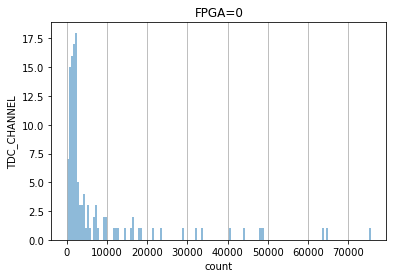

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
group = data
group1 = data[data['FPGA']==0].groupby('TDC_CHANNEL').size()

group1.plot.hist(bins=150, alpha=0.5)

plt.title('FPGA=0')
plt.xlabel('count')
plt.ylabel('TDC_CHANNEL')
plt.grid(axis='x')




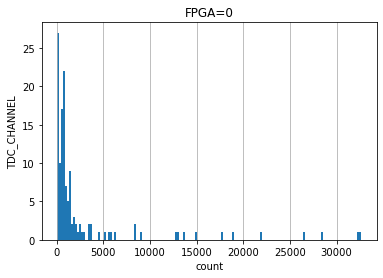

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
group = data

group2 = data[data['FPGA']==1].groupby('TDC_CHANNEL').size()

group2.plot.hist(bins=150, alpha=1)

plt.title('FPGA=0')
plt.xlabel('count')
plt.ylabel('TDC_CHANNEL')
plt.grid(axis='x')